In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import load_model

In [3]:
def read_data(csv_path):
    with open(csv_path, "r") as file:
        lines = file.read().splitlines()
    return [ line.split(",") for line in lines ]

In [4]:
def read_image(path):
    bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

def preprocess(rgb):
    x = cv2.resize(rgb, (32, 32)) / 255.
    return x.reshape((1, 32, 32, 3))

In [5]:
model = load_model("best_model.h5")

In [6]:
test_data = read_data("test.csv")

In [7]:
label_dict = {
    0: "without mask",
    1: "with mask"
}

In [17]:
index = 12

image_path = test_data[index][0]
y = int(test_data[index][1])

print(image_path, y)

with_mask\with_mask_1369.png 1


In [18]:
image = read_image(image_path)
x = preprocess(image)
y_pred = model.predict(x)
pred = label_dict[y_pred.argmax()]

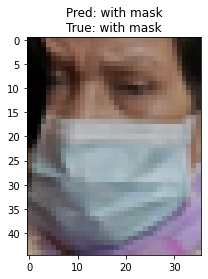

In [19]:
plt.title(f"Pred: {pred}\nTrue: {label_dict[y]}")
plt.imshow(image)